In [1]:
import pandas as pd 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_theme()


In [2]:
df=pd.read_csv('D:\\INSEA\\Stage PFA\\Stage Ministère de finance\\data\\tourism\\TES_with_feuters.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
#df = df.asfreq('MS')  # MS = Month Start
#df = df.sort_index()

##### sentiment anlysis data preparation

In [3]:
# sa=pd.read_csv("D:\\INSEA\\Stage PFA\\Stage Ministère de finance\\data\\reviews\\reviews_month_imputed.csv")


In [4]:
# def prepar(data):
#     results=[]
#     dates=list(data['month'].unique())
#     for d in dates:
#         L=data[data["month"]==d]
#         NSI=(len(L[L["sentiment_label"]=="positive"])-len(L[L["sentiment_label"]=="negative"]))/len(L)
#         #avg_neg=-1*len(L[L["sentiment_label"]=="negative"])/len(L)
#         results.append({
#             "date":d,
#             "review_count":len(L),
#             "NSI":round(NSI,3)
#         })
#     return pd.DataFrame(results)
# sentiments=prepar(sa)

In [5]:
# sentiments['date']=pd.to_datetime(sentiments['date'])
# #sentiments = sentiments.asfreq('MS')

In [6]:
# all=pd.merge(df,sentiments,on='date',how='outer')
# all.set_index('date', inplace=True)
# all=all.dropna(subset='TES')
# all['review_count'] = all['review_count'].interpolate(method='time')
# #all['NSI'] = all['NSI'].fillna(0)
# all['NSI'] = all['NSI'].interpolate(method='time')
# all['NSI']=all['NSI'].shift(1)
# all['review_count'] = all['review_count'].shift(1)
# #all
# print(all.corr())

In [7]:
#df['TES_log'] = np.log(df['TES'] + 1)

In [8]:
#Variable: is_pandemic =>  To explain COVID-19 effect

# pandemic_start = '2020-01-01'
# pandemic_end = '2022-09-30'
# df['is_pandemic'] = 0
# df.loc[pandemic_start:pandemic_end, 'is_pandemic'] = 1

exog_variables = [
    "is_pandemic",
    "marrakech_lag_1",
    "NSI",
    "review_count"
]

In [9]:
print(df.corr())

                      TES  marrakech_lag_1  review_count       NSI  \
TES              1.000000         0.826469      0.139843 -0.044970   
marrakech_lag_1  0.826469         1.000000      0.142453 -0.058254   
review_count     0.139843         0.142453      1.000000 -0.432300   
NSI             -0.044970        -0.058254     -0.432300  1.000000   
is_pandemic     -0.655924        -0.471885      0.067685 -0.015506   

                 is_pandemic  
TES                -0.655924  
marrakech_lag_1    -0.471885  
review_count        0.067685  
NSI                -0.015506  
is_pandemic         1.000000  


In [10]:
df.dropna(inplace=True)
len(df)

183

In [11]:
print(df.corr())

                      TES  marrakech_lag_1  review_count       NSI  \
TES              1.000000         0.826469      0.139843 -0.044970   
marrakech_lag_1  0.826469         1.000000      0.142453 -0.058254   
review_count     0.139843         0.142453      1.000000 -0.432300   
NSI             -0.044970        -0.058254     -0.432300  1.000000   
is_pandemic     -0.655924        -0.471885      0.067685 -0.015506   

                 is_pandemic  
TES                -0.655924  
marrakech_lag_1    -0.471885  
review_count        0.067685  
NSI                -0.015506  
is_pandemic         1.000000  


#### Premier décomposition 

In [12]:
train_a=df.loc['02-2010':'04-2020']
test_a=df.loc['05-2020':]

X_train_a = train_a[exog_variables]
X_test_a = test_a[exog_variables]
y_train_a = train_a['TES']
y_test_a = test_a['TES']
print("taille du train:",len(train_a),"\ntaille du test :",len(test_a))

taille du train: 123 
taille du test : 60


#### deuxiéme decomposition

In [13]:
train_b=df.loc['01-2010':'12-2024']
test_b=df.loc['01-2023':]
X_train_b = train_b[exog_variables]
X_test_b = test_b[exog_variables]
y_train_b = train_b['TES']
y_test_b = test_b['TES']
print("taille du train:",len(train_b),"\ntaille du test :",len(test_b))

taille du train: 179 
taille du test : 28


In [23]:
X_test_b

,is_pandemic,marrakech_lag_1,NSI,review_count
date,,,,
2023-01-01,0,69.0,0.600,5.0
2023-02-01,0,77.0,0.500,4.0
2023-03-01,0,77.0,0.800,10.0
2023-04-01,0,70.0,1.000,5.0
2023-05-01,0,76.0,0.636,11.0
2023-06-01,0,73.0,0.412,17.0
2023-07-01,0,66.0,1.000,13.0
2023-08-01,0,75.0,0.765,17.0
2023-09-01,0,82.0,0.692,52.0


#### troisiéme décomposition

In [14]:
train_c=df.loc['02-2010':'01-2024']
test_c=df.loc['02-2024':]
X_train_c = train_c[exog_variables]
X_test_c = test_c[exog_variables]
y_train_c = train_c['TES']
y_test_c = test_c['TES']
print("taille du train:",len(train_c),"\ntaille du test :",len(test_c))

taille du train: 168 
taille du test : 15


In [15]:
def grid_search_sarima(train_data, colonne='TES',
                       p_range=range(0, 2), d_range=range(1,2), q_range=range(0, 2),
                       P_range=range(0, 3), D_range=range(1,3), Q_range=range(0, 3),
                       s=[12]):
    print("\n" + "="*70)
    print("GRID SEARCH SARIMA - VERSION OPTIMISÉE")
    print("="*70)
    # Générer toutes les combinaisons
    pdq = list(itertools.product(p_range, d_range, q_range))
    seasonal_pdq = list(itertools.product(P_range, D_range, Q_range, s))
    
    total_models = len(pdq) * len(seasonal_pdq)
    print(f"\nNombre total de modèles à tester: {total_models}")
    print("Démarrage de la recherche...\n")
    # Variables pour stocker uniquement le meilleur
    meilleur_aic = np.inf
    meilleur_modele = None
    meilleur_params = None
    meilleur_params_seasonal = None
    meilleur_bic = None
    
    compteur = 0
    modeles_testes = 0
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            compteur += 1
            
            try:
                # Ajuster le modèle
                model = SARIMAX(train_data[colonne],exog=train_data[exog_variables],
                               order=param,
                               seasonal_order=param_seasonal)
                
                results = model.fit(disp=False, maxiter=200)
                modeles_testes += 1
                
                # Garder uniquement si c'est le meilleur
                if results.aic < meilleur_aic:
                    meilleur_aic = results.aic
                    meilleur_bic = results.bic
                    meilleur_modele = results
                    meilleur_params = param
                    meilleur_params_seasonal = param_seasonal
                    
                    # Afficher quand on trouve un meilleur modèle
                    print(f"  ✓ Nouveau meilleur: SARIMA{param}x{param_seasonal} - AIC: {results.aic:.2f}")
                
                # Afficher progression
                if compteur % 10 == 0 or compteur == total_models:
                    print(f"  Progression: {compteur}/{total_models} combinaisons testées ({modeles_testes} réussies)...")
                
            except Exception as e:
                # Ignorer les modèles qui ne convergent pas
                continue
    
    # Vérifier qu'au moins un modèle a convergé
    if meilleur_modele is None:
        raise ValueError("❌ Aucun modèle n'a convergé ! Essayez avec des plages de paramètres différentes.")
    
    print("\n" + "="*70)
    print("🏆 MEILLEUR MODÈLE TROUVÉ")
    print("="*70)
    print(f"SARIMA{meilleur_params}x{meilleur_params_seasonal}")
    print(f"AIC: {meilleur_aic:.2f}")
    print(f"BIC: {meilleur_bic:.2f}")
    print(f"\nModèles testés avec succès: {modeles_testes}/{total_models}")
    
    return {
        'params': meilleur_params,
        'seasonal_params': meilleur_params_seasonal,
        'aic': meilleur_aic,
        'bic': meilleur_bic,
        'model': meilleur_modele
    }

##### 1er décomposition 

In [16]:
meilleur = grid_search_sarima(train_a)


GRID SEARCH SARIMA - VERSION OPTIMISÉE

Nombre total de modèles à tester: 72
Démarrage de la recherche...

  ✓ Nouveau meilleur: SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC: 3180.08
  ✓ Nouveau meilleur: SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC: 2777.17


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency informa

  ✓ Nouveau meilleur: SARIMA(0, 1, 0)x(0, 2, 1, 12) - AIC: 2492.89


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

  Progression: 10/72 combinaisons testées (10 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible s

  Progression: 20/72 combinaisons testées (20 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  ✓ Nouveau meilleur: SARIMA(0, 1, 1)x(0, 2, 1, 12) - AIC: 2490.65


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

  Progression: 30/72 combinaisons testées (30 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency informa

  Progression: 40/72 combinaisons testées (40 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

  Progression: 50/72 combinaisons testées (50 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency informa

  Progression: 60/72 combinaisons testées (60 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency informa

  Progression: 70/72 combinaisons testées (70 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible s

  Progression: 72/72 combinaisons testées (72 réussies)...

🏆 MEILLEUR MODÈLE TROUVÉ
SARIMA(0, 1, 1)x(0, 2, 1, 12)
AIC: 2490.65
BIC: 2508.74

Modèles testés avec succès: 72/72


In [17]:
model = SARIMAX(train_a['TES'],exog=train_a[exog_variables],order=meilleur['params'],seasonal_order=meilleur['seasonal_params'])
results = model.fit(disp=False,maxiter=200)#, cov_type='robust')
#print(results.summary())

c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [18]:
start_index = test_a.index.min()
end_index = test_a.index.max()
predictions = results.predict(start=start_index, end=end_index, exog=X_test_a)
#predictions = np.exp(predictions_log) - 1


RMSE: 3,998,742.01
MAE: 3,253,791.46
MAPE: 3,349,875,124,439,275,274,240.00%
R²: -18,121.64%
R²: -181.2164


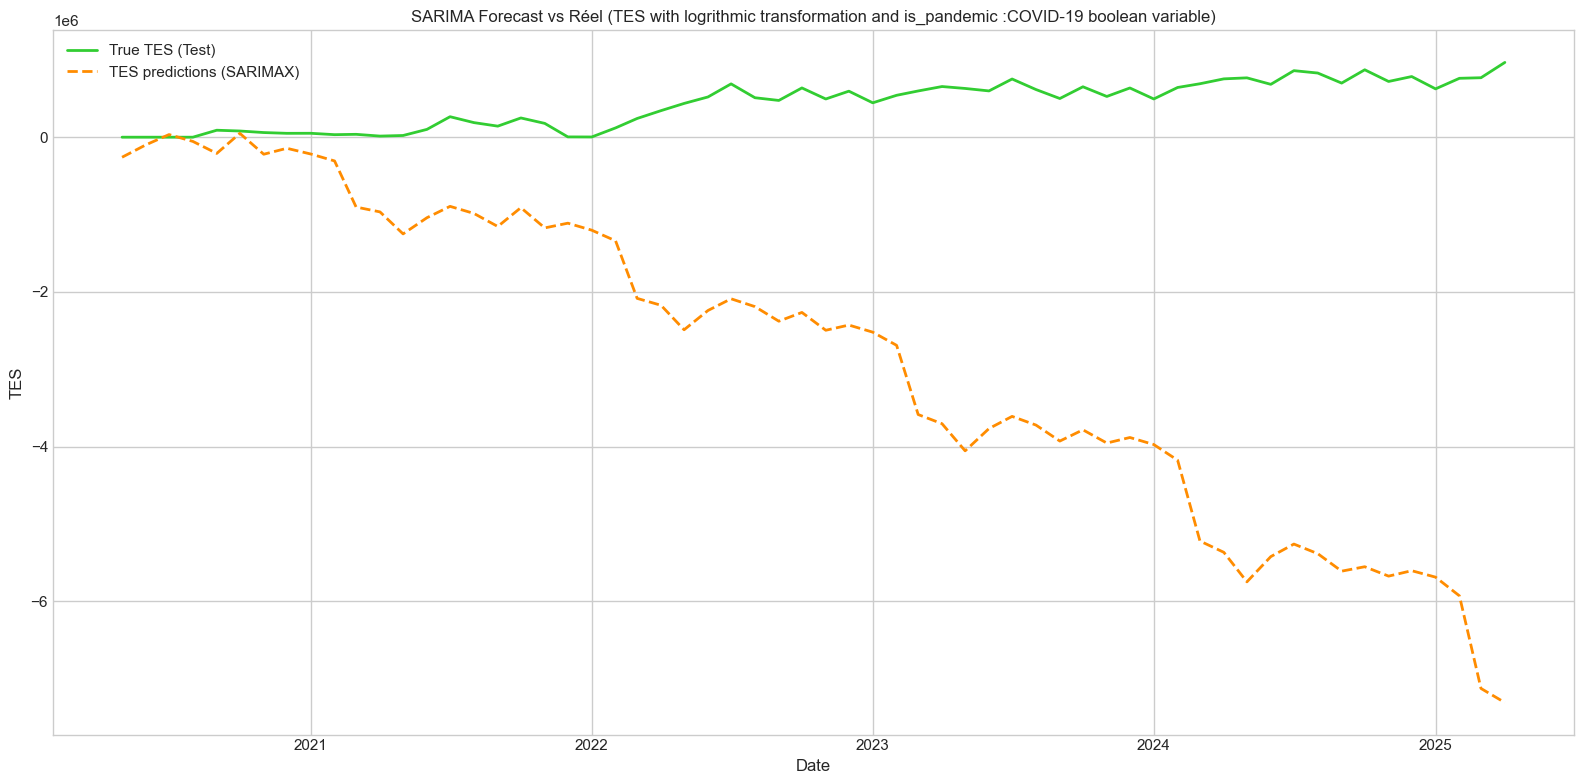

In [19]:
rmse = root_mean_squared_error(y_test_a, predictions)
r2 = r2_score(y_test_a, predictions)
mae = mean_absolute_error(y_test_a, predictions)
mape = mean_absolute_percentage_error(y_test_a, predictions)
print(f"\nRMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")
print(f"MAPE: {mape:,.2%}")
print(f"R²: {r2:,.2%}")
print(f"R²: {r2:.4f}")


#Visualization
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 8))
#plt.plot(train['TES'], label='Training data', color='royalblue')
plt.plot(y_test_a, label='True TES (Test)', color='limegreen', linewidth=2)
plt.plot(predictions, label='TES predictions (SARIMAX)', color='darkorange', linestyle='--', linewidth=2)
plt.title("SARIMA Forecast vs Réel (TES with logrithmic transformation and is_pandemic :COVID-19 boolean variable)")
plt.xlabel('Date', fontsize=12)
plt.ylabel('TES', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2eme décomposition 

In [20]:
meilleur = grid_search_sarima(train_b)


GRID SEARCH SARIMA - VERSION OPTIMISÉE

Nombre total de modèles à tester: 72
Démarrage de la recherche...

  ✓ Nouveau meilleur: SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC: 4935.90
  ✓ Nouveau meilleur: SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC: 4219.61


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency informa

  ✓ Nouveau meilleur: SARIMA(0, 1, 0)x(0, 2, 1, 12) - AIC: 4000.66


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

  Progression: 10/72 combinaisons testées (10 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  ✓ Nouveau meilleur: SARIMA(0, 1, 0)x(1, 2, 1, 12) - AIC: 3996.71


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

  ✓ Nouveau meilleur: SARIMA(0, 1, 0)x(2, 2, 1, 12) - AIC: 3982.92


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

  Progression: 20/72 combinaisons testées (20 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

  Progression: 30/72 combinaisons testées (30 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency informa

  Progression: 40/72 combinaisons testées (40 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

  Progression: 50/72 combinaisons testées (50 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency informa

  Progression: 60/72 combinaisons testées (60 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency informa

  Progression: 70/72 combinaisons testées (70 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueW

  Progression: 72/72 combinaisons testées (72 réussies)...

🏆 MEILLEUR MODÈLE TROUVÉ
SARIMA(0, 1, 0)x(2, 2, 1, 12)
AIC: 3982.92
BIC: 4007.22

Modèles testés avec succès: 72/72


In [ ]:
model = SARIMAX(train_b['TES'],exog=X_train_b ,order=meilleur['params'],seasonal_order=meilleur['seasonal_params'])
results = model.fit(disp=False,maxiter=200)#, cov_type='robust')
#print(results.summary())

c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [32]:
X_train_b.shape

(179, 4)

In [40]:
start_index = X_test_b.index.min()
end_index = X_test_b.index.max()
predictions = results.predict(start=start_index, end=end_index, exog=X_test_b)
#predictions = np.exp(predictions_log) - 1

ValueError: Provided exogenous values are not of the appropriate shape. Required (4, 4), got (28, 4).

In [ ]:
rmse = root_mean_squared_error(y_test_b, predictions)
r2 = r2_score(y_test_b, predictions)
mae = mean_absolute_error(y_test_b, predictions)
mape = mean_absolute_percentage_error(y_test_b, predictions)
print(f"\nRMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")
print(f"MAPE: {mape:,.2%}")
print(f"R²: {r2:,.2%}")
print(f"R²: {r2:.4f}")


#Visualization
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 8))
#plt.plot(train['TES'], label='Training data', color='royalblue')
plt.plot(y_test_b, label='True TES (Test)', color='limegreen', linewidth=2)
plt.plot(predictions, label='TES predictions (SARIMAX)', color='darkorange', linestyle='--', linewidth=2)
plt.title("SARIMA Forecast vs Réel (TES with logrithmic transformation and is_pandemic :COVID-19 boolean variable)")
plt.xlabel('Date', fontsize=12)
plt.ylabel('TES', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### 3eme décomposition 

In [41]:
meilleur = grid_search_sarima(train_c)


GRID SEARCH SARIMA - VERSION OPTIMISÉE

Nombre total de modèles à tester: 72
Démarrage de la recherche...

  ✓ Nouveau meilleur: SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC: 4606.16
  ✓ Nouveau meilleur: SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC: 3945.64


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency informa

  ✓ Nouveau meilleur: SARIMA(0, 1, 0)x(0, 2, 1, 12) - AIC: 3724.59


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

  Progression: 10/72 combinaisons testées (10 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  ✓ Nouveau meilleur: SARIMA(0, 1, 0)x(1, 2, 1, 12) - AIC: 3718.04


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

  ✓ Nouveau meilleur: SARIMA(0, 1, 0)x(2, 2, 1, 12) - AIC: 3704.99


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

  Progression: 20/72 combinaisons testées (20 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

  Progression: 30/72 combinaisons testées (30 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency informa

  Progression: 40/72 combinaisons testées (40 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

  Progression: 50/72 combinaisons testées (50 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency informa

  Progression: 60/72 combinaisons testées (60 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency informa

  Progression: 70/72 combinaisons testées (70 réussies)...


c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueW

  Progression: 72/72 combinaisons testées (72 réussies)...

🏆 MEILLEUR MODÈLE TROUVÉ
SARIMA(0, 1, 0)x(2, 2, 1, 12)
AIC: 3704.99
BIC: 3728.69

Modèles testés avec succès: 72/72


In [42]:
model = SARIMAX(train_c['TES'],exog=train_c[exog_variables],order=meilleur['params'],seasonal_order=meilleur['seasonal_params'])
results = model.fit(disp=False,maxiter=200)#, cov_type='robust')
#print(results.summary())

c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\masta\anaconda3\envs\ML_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [46]:
start_index = test_c.index.min()
end_index = test_c.index.max()
predictions = results.predict(start=start_index, end=end_index, exog=X_test_c)
#predictions = np.exp(predictions_log) - 1


RMSE: 69,929.00
MAE: 59,646.92
MAPE: 7.87%
R²: 38.15%
R²: 0.3815


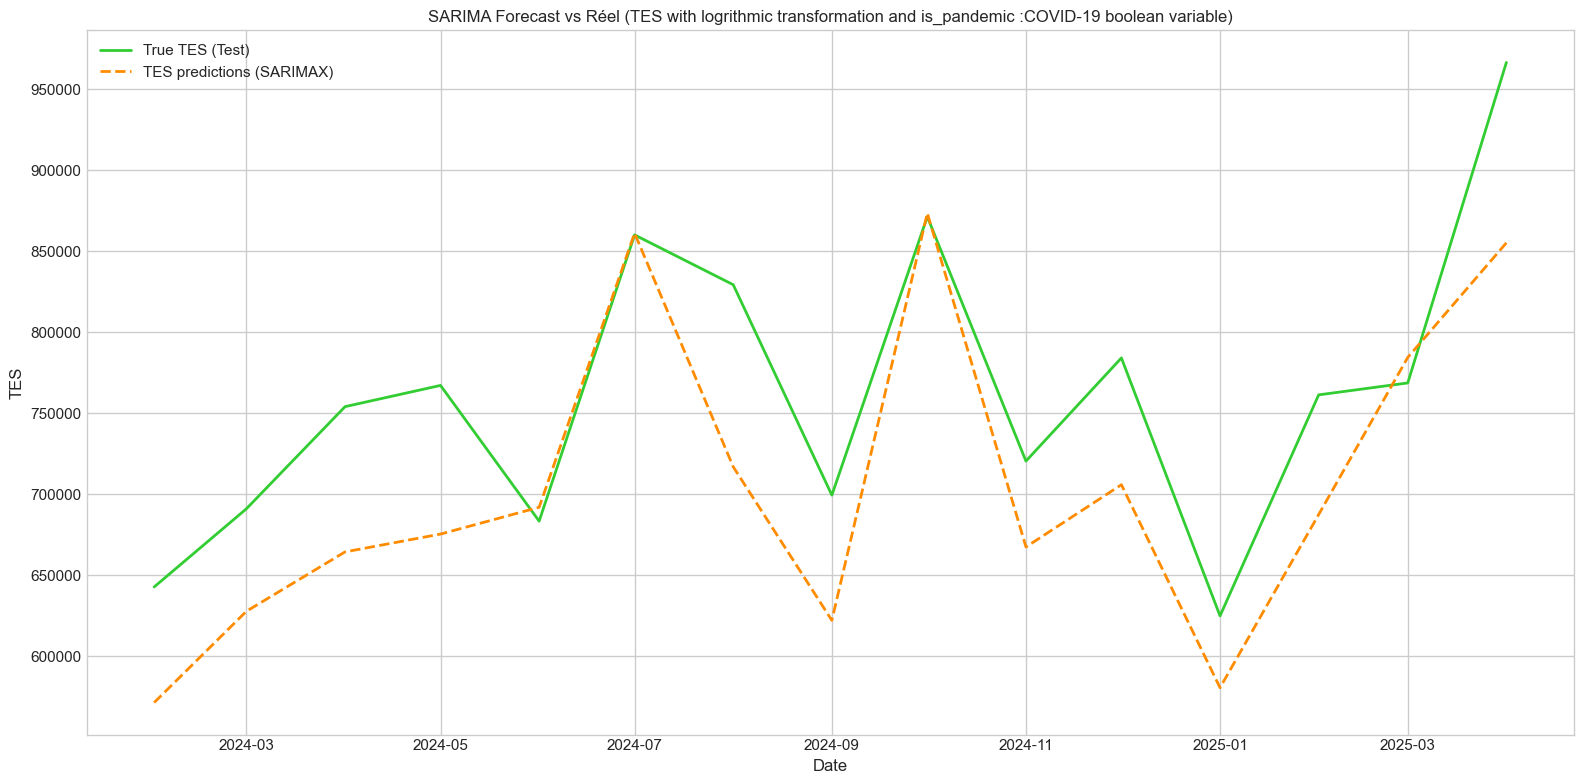

In [44]:
rmse = root_mean_squared_error(y_test_c, predictions)
r2 = r2_score(y_test_c, predictions)
mae = mean_absolute_error(y_test_c, predictions)
mape = mean_absolute_percentage_error(y_test_c, predictions)
print(f"\nRMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")
print(f"MAPE: {mape:,.2%}")
print(f"R²: {r2:,.2%}")
print(f"R²: {r2:.4f}")


#Visualization
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 8))
#plt.plot(train['TES'], label='Training data', color='royalblue')
plt.plot(y_test_c, label='True TES (Test)', color='limegreen', linewidth=2)
plt.plot(predictions, label='TES predictions (SARIMAX)', color='darkorange', linestyle='--', linewidth=2)
plt.title("SARIMA Forecast vs Réel (TES with logrithmic transformation and is_pandemic :COVID-19 boolean variable)")
plt.xlabel('Date', fontsize=12)
plt.ylabel('TES', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()